In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing


In [108]:
fetch_california_housing()

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]], shape=(20640, 8)),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894], shape=(20640,)),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': 

In [109]:
cal_house_price = fetch_california_housing(as_frame=True)

In [110]:
type(cal_house_price)

sklearn.utils._bunch.Bunch

In [111]:
cal_house_price.data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [112]:
df = pd.DataFrame(cal_house_price.data)

In [113]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [114]:
cal_house_price.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [115]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

In [116]:
# preprocess
df.shape

(20640, 8)

In [117]:
df.isna().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

In [118]:
# independent and dependent features
X = df
y = cal_house_price.target 
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

In [119]:
# train test split

from sklearn.model_selection import train_test_split

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.3)

In [121]:
print(X_train)
X_train.shape

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
7061   4.1312      35.0  5.882353   0.975490      1218.0  2.985294     33.93   
14689  2.8631      20.0  4.401210   1.076613       999.0  2.014113     32.79   
17323  4.2026      24.0  5.617544   0.989474       731.0  2.564912     34.59   
10056  3.1094      14.0  5.869565   1.094203       302.0  2.188406     39.26   
15750  3.3068      52.0  4.801205   1.066265      1526.0  2.298193     37.77   
...       ...       ...       ...        ...         ...       ...       ...   
11284  6.3700      35.0  6.129032   0.926267       658.0  3.032258     33.78   
11964  3.0500      33.0  6.868597   1.269488      1753.0  3.904232     34.02   
5390   2.9344      36.0  3.986717   1.079696      1756.0  3.332068     34.03   
860    5.7192      15.0  6.395349   1.067979      1777.0  3.178891     37.58   
15795  2.5755      52.0  3.402576   1.058776      2619.0  2.108696     37.77   

       Longitude  
7061     -118.02  
1

(14448, 8)

In [122]:
# # standardizing the dataset

# from sklearn.preprocessing import StandardScaler
# scaler  = StandardScaler()
# X_train = scaler.fit_transform(X_train) # fit_transform: on training data to learn and transform
# # print(X_train)
# X_test = scaler.transform(X_test) # transform: on test/unseen data to apply the same transformation that was learned on the training data.
# # print(X_test)

In [123]:
# # from sklearn.preprocessing import  Normalizer
# # transformer = Normalizer().fit(X) 
# # transformer.transform(X_train)
# from sklearn.preprocessing import power_transform
# power_transform(X_train, method='yeo-johnson')


In [124]:
# to reverse transform, use scaler.inverse_transform over the transformed data

In [125]:
# model import
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [126]:
# cross validation
from sklearn.model_selection import cross_val_score
mse = cross_val_score(regression, X_train, y_train, scoring='neg_mean_squared_error',cv=5 )
print(np.mean(mse))


-0.5268253746355737


In [127]:
# prediction
reg_pred = regression.predict(X_test)
reg_pred

array([0.72604907, 1.76743383, 2.71092161, ..., 2.07465531, 1.57371395,
       1.82744133], shape=(6192,))

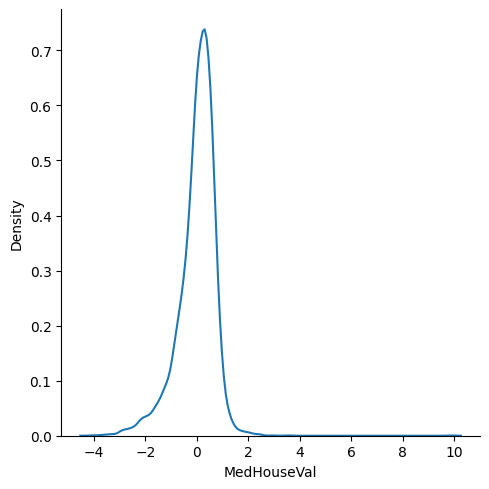

In [128]:
# visualize the original test (y_test) and predicted test (reg_pred)
import seaborn as sns
sns.displot(reg_pred-y_test,kind='kde')

In [129]:
# accuracy
from sklearn.metrics import r2_score


In [130]:
# accuracy test data
score = r2_score(y_test, reg_pred)
score

0.5957702326061662